In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima 
from matplotlib import pyplot
plt.style.use('fivethirtyeight')

In [5]:
covid_data_filepath = 'C:/Users/Aryan/Downloads/4June.csv'
data = pd.read_csv(covid_data_filepath, parse_dates=True, infer_datetime_format=True, index_col = 0)
data.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
Date,,,,,,,,,,,
2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


Text(0, 0.5, 'Confirmed Cases')

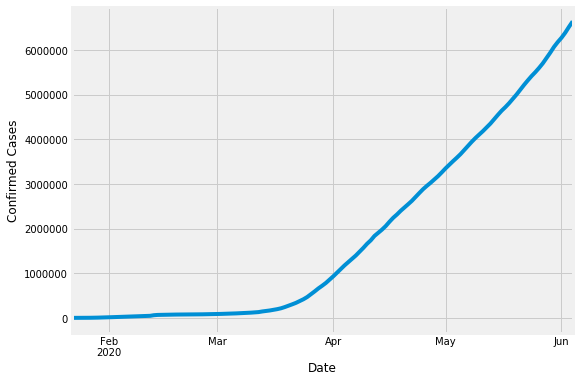

In [9]:
y = data.Confirmed
dp = y.plot(figsize=(8, 6))
dp.set_xlabel('Date')
dp.set_ylabel('Confirmed Cases')

In [10]:
# evaluate an ARIMA model for a given order (p,d,q)

def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    
# load dataset
#series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
# evaluate parameters
p_values = [0, 1, 2, 3, 4, 5, 6, 7, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(y, p_values, d_values, q_values)    
    

ARIMA(0, 0, 0) MSE=11729758003494.244
ARIMA(0, 0, 1) MSE=2987419323557.831
ARIMA(0, 0, 2) MSE=825986194767.773
ARIMA(0, 1, 0) MSE=3039094326.381
ARIMA(0, 1, 1) MSE=944960189.967
ARIMA(0, 2, 0) MSE=71945288.206
ARIMA(0, 2, 1) MSE=79118120.187
ARIMA(0, 2, 2) MSE=72287825.705
ARIMA(1, 0, 0) MSE=8802512582.291
ARIMA(1, 1, 0) MSE=73121436.123
ARIMA(1, 2, 0) MSE=77704650.162
ARIMA(1, 2, 1) MSE=70878648.030
ARIMA(2, 1, 0) MSE=77899717.250
ARIMA(2, 2, 0) MSE=77458291.877
ARIMA(2, 2, 1) MSE=67067577.302
ARIMA(3, 1, 0) MSE=78492887.720
ARIMA(3, 2, 0) MSE=64878353.417
ARIMA(3, 2, 1) MSE=61003595.403
ARIMA(4, 1, 0) MSE=66448806.784
ARIMA(4, 2, 0) MSE=63192071.524
ARIMA(4, 2, 1) MSE=63995534.245
ARIMA(5, 1, 0) MSE=67132269.051
ARIMA(5, 2, 0) MSE=59600090.089
ARIMA(5, 2, 1) MSE=63704222.074
ARIMA(6, 1, 0) MSE=67761504.129
ARIMA(6, 2, 0) MSE=59841860.676
ARIMA(6, 2, 1) MSE=54380628.111
ARIMA(7, 1, 0) MSE=68420909.282
ARIMA(7, 2, 0) MSE=51027249.074
ARIMA(7, 2, 1) MSE=43324917.288
ARIMA(8, 1, 0) MSE=5

In [13]:
mod = ARIMA(y, order=(7, 2, 1))

results = mod.fit()

print(results.summary().tables[1])

                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                926.2219    551.350      1.680      0.093    -154.403    2006.847
ar.L1.D2.Confirmed     0.2753      0.102      2.705      0.007       0.076       0.475
ar.L2.D2.Confirmed    -0.0565      0.083     -0.681      0.496      -0.219       0.106
ar.L3.D2.Confirmed    -0.1761      0.084     -2.108      0.035      -0.340      -0.012
ar.L4.D2.Confirmed     0.1306      0.088      1.478      0.139      -0.043       0.304
ar.L5.D2.Confirmed    -0.0880      0.085     -1.037      0.300      -0.254       0.078
ar.L6.D2.Confirmed     0.1440      0.088      1.637      0.102      -0.028       0.316
ar.L7.D2.Confirmed     0.4590      0.086      5.361      0.000       0.291       0.627
ma.L1.D2.Confirmed    -0.6138      0.086     -7.154      0.000      -0.782      -0.446


In [14]:
mod = sm.tsa.statespace.SARIMAX(covid_data.Confirmed,
                                order=(7, 2, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results2 = mod.fit()

print(results2.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2978      0.123      2.420      0.016       0.057       0.539
ar.L2         -0.0453      0.076     -0.593      0.553      -0.195       0.104
ar.L3         -0.1611      0.101     -1.589      0.112      -0.360       0.038
ar.L4          0.1535      0.123      1.248      0.212      -0.088       0.395
ar.L5         -0.0835      0.120     -0.697      0.486      -0.318       0.151
ar.L6          0.1702      0.096      1.780      0.075      -0.017       0.358
ar.L7          0.5054      0.133      3.810      0.000       0.245       0.765
ma.L1         -0.6263      0.132     -4.761      0.000      -0.884      -0.369
sigma2      3.869e+07   1.24e-09   3.11e+16      0.000    3.87e+07    3.87e+07


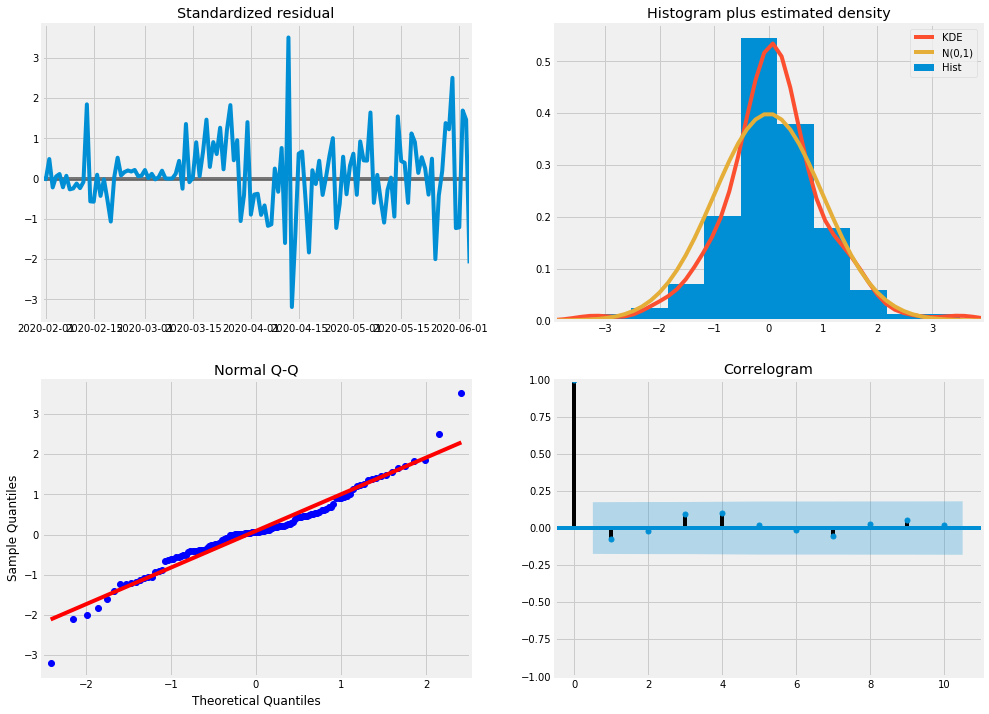

In [15]:
results2.plot_diagnostics(figsize=(15, 12))
plt.show()

In [19]:
"""X = y
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(8,2,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()"""

predicted=2481854.630946, expected=2471525.000000
predicted=2540599.852934, expected=2546166.000000
predicted=2621787.308207, expected=2622011.000000
predicted=2709602.600042, expected=2710896.000000
predicted=2797673.730061, expected=2798325.000000
predicted=2875743.532358, expected=2883681.000000
predicted=2964826.695448, expected=2957613.000000
predicted=3034853.053222, expected=3026476.000000
predicted=3097835.611658, expected=3100339.000000
predicted=3177135.203159, expected=3175857.000000
predicted=3258156.016679, expected=3260711.000000
predicted=3345035.114672, expected=3349174.000000
predicted=3434066.965375, expected=3431309.000000
predicted=3507085.877270, expected=3510416.000000
predicted=3583445.213702, expected=3587133.000000
predicted=3665781.952947, expected=3667894.000000
predicted=3750829.237015, expected=3760095.000000
predicted=3853342.998408, expected=3851154.000000
predicted=3945710.386452, expected=3944261.000000
predicted=4033808.651970, expected=4029622.000000


ValueError: view limit minimum -36879.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [27]:
pred = results2.get_prediction(start=pd.to_datetime('2020-04-20'), dynamic=False)
pred_ci = pred.conf_int()

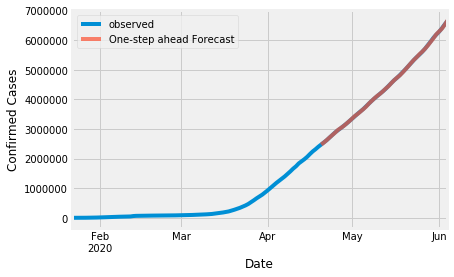

In [28]:
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
plt.legend()

plt.show()

In [43]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-04-20':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 36870771.06


In [51]:
pred_dynamic = results2.get_prediction(start=pd.to_datetime('2020-01-22'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [139]:
# Get forecast 21 steps ahead in future
pred_uc = results2.get_forecast(steps=21)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
preds = pred_uc.predicted_mean
print(preds)

2020-06-05    6.771272e+06
2020-06-06    6.902952e+06
2020-06-07    7.025310e+06
2020-06-08    7.138065e+06
2020-06-09    7.260835e+06
2020-06-10    7.396612e+06
2020-06-11    7.532790e+06
2020-06-12    7.669385e+06
2020-06-13    7.806015e+06
2020-06-14    7.937388e+06
2020-06-15    8.062954e+06
2020-06-16    8.194327e+06
2020-06-17    8.335151e+06
2020-06-18    8.478927e+06
2020-06-19    8.621981e+06
2020-06-20    8.763665e+06
2020-06-21    8.901818e+06
2020-06-22    9.036816e+06
2020-06-23    9.175440e+06
2020-06-24    9.320984e+06
2020-06-25    9.469875e+06
Freq: D, dtype: float64


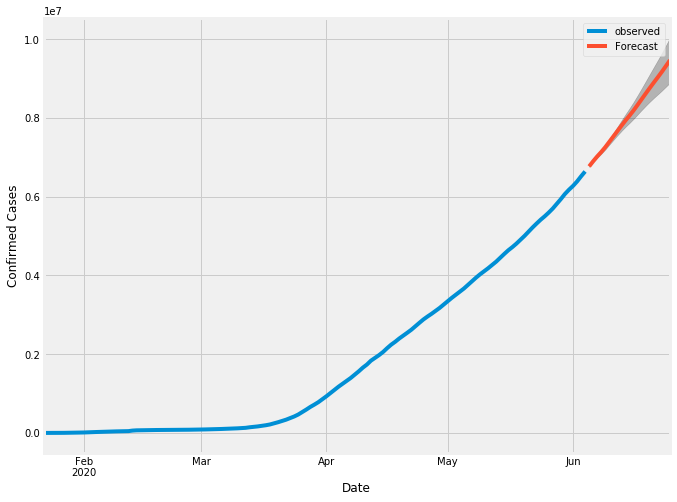

In [59]:
ax = y.plot(label='observed', figsize=(10, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')

plt.legend()
plt.show()

In [122]:
latest_covid_data_filepath = 'C:/Users/Aryan/Downloads/day_wise.csv'
latest_data = pd.read_csv(latest_covid_data_filepath, parse_dates=True, infer_datetime_format=True, index_col = 0)
y2 = latest_data.Confirmed

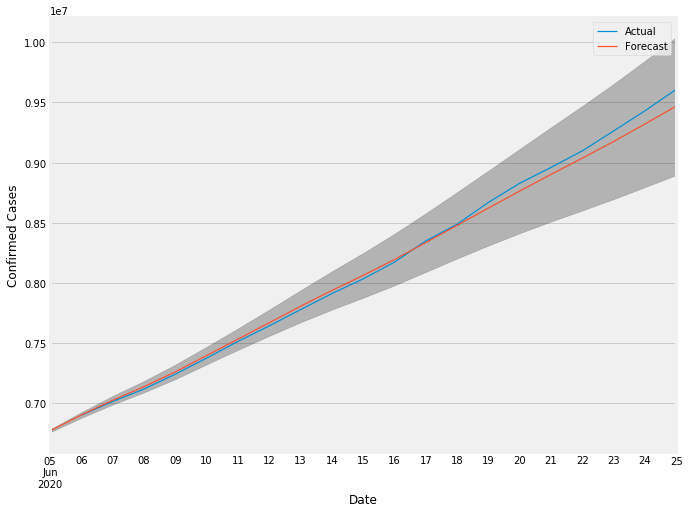

In [133]:
ax = y2.iloc[136:].plot(label='Actual', figsize=(10, 8), linewidth = 1.2)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', linewidth = 1.2)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')

plt.legend()
plt.show()

In [108]:
latest_data.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
Date,,,,,,,,,,,
2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


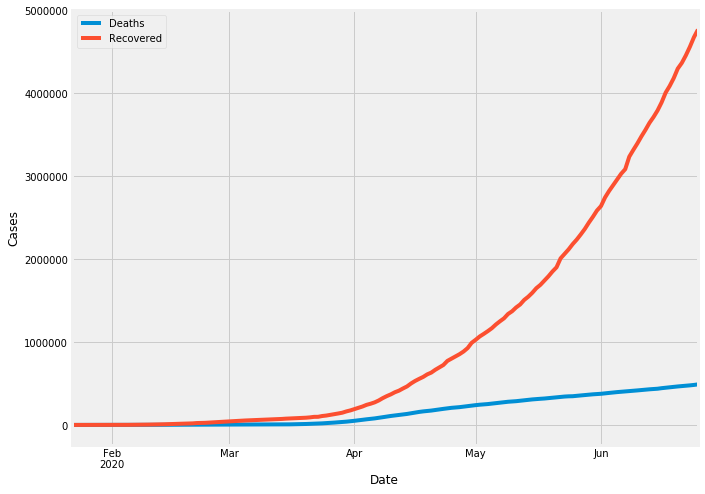

In [116]:
deaths = latest_data.Deaths
recovered = latest_data.Recovered
ax = deaths.plot(label = 'Deaths', figsize=(10, 8))
recovered.plot(ax = ax, label = 'Recovered')
ax.set_ylabel('Cases')
plt.legend()
plt.show()